# Receiver
----

In [51]:
# imported libraries
import cv2 as cv
import matplotlib.pyplot as plt
from lib.conversion import *
from lib.encrypt import *
from lib.PRBG import *
from lib.noise import *
from lib.degradation import *

In [52]:
# seed parameters for decryption
key = {
    'diffusion_range' : 5,
    'x0' : .5,
    'y0' : .7
}

In [53]:
# read an image file
img = cv.imread('cipherImage.tiff', cv.IMREAD_GRAYSCALE)
print("Image document type is: {}".format(img.dtype))
height = img.shape[0]
width = img.shape[1]

Image document type is: uint8


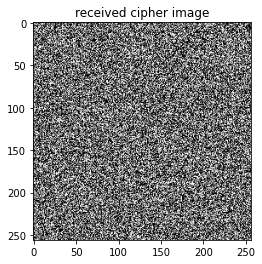

In [54]:
# plot image
plt.title('received cipher image')
plt.imshow(img, cmap='gray')

In [55]:
# obtaining bitplanes
encp = Encryption()
bitplane_images = encp.bitplane_decomposition(img, height, width)
titles = ['bitplane8',
          'bitplane7',
          'bitplane6',
          'bitplane5',
          'bitplane4',
          'bitplane3',
          'bitplane2',
          'bitplane1']

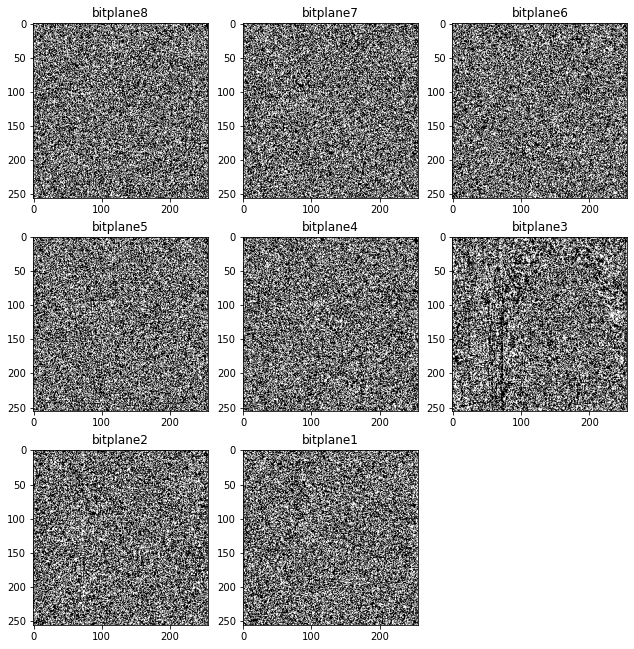

In [56]:
# viewing bitplane images
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.title(titles[i])
    plt.imshow(convert_to_255(bitplane_images[i]), cmap='gray', vmin=0, vmax=255)

plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2)

In [57]:
# CCCBG
cccbg = CCCBG(key['x0'], key['y0'])

mats = []
for i in range(key['diffusion_range']):
    bitplane_images[i] = cv.bitwise_xor(cccbg.generateMatrix(height, width), bitplane_images[i])
    mats.append(cccbg.generateMatrix(height, width))

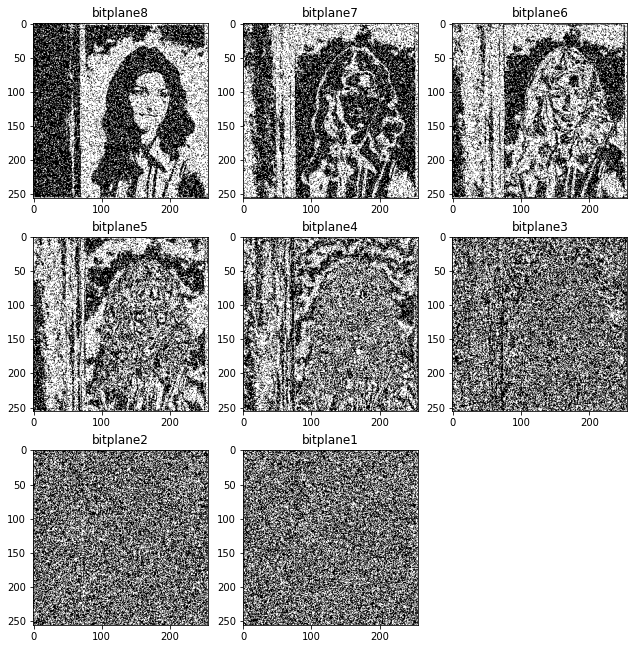

In [58]:
# viewing bitplane images
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.title(titles[i])
    plt.imshow(convert_to_255(bitplane_images[i]), cmap='gray', vmin=0, vmax=255)

plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2)

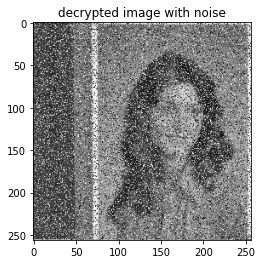

In [59]:
decrypted_img = cipher_image_composition(bitplane_images, height, width)
plt.title('decrypted image with noise')
plt.imshow(decrypted_img, cmap='gray')

# Noise Analysis
----

### Peak Signla to Noise Ratio (PSNR)

Peak signal-to-noise ratio (PSNR) is the ratio between the maximum possible power of an image and the power of corrupting noise that affects the quality of its representation. To estimate the PSNR of an image, it is necessary to compare that image to an ideal clean image with the maximum possible power.

In [60]:
noise = Noise()
img = cv.imread('test-images/miscellaneous/4.1.04.tiff', cv.IMREAD_GRAYSCALE)
psnr = noise.PSNR(img, decrypted_img)
print("Peak Signla to Noise Ratio is {} DB".format(psnr))

Peak Signla to Noise Ratio is 32.0883291130395 DB


# Degradation

In [61]:
degradation = Degreadation(decrypted_img, height, width)
for i in range(6):
    de_img = degradation.medianFilter()

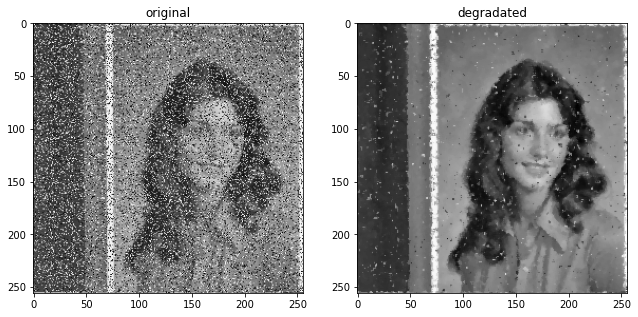

In [62]:
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(decrypted_img, cmap='gray')
plt.subplot(1,2,2)
plt.title('degradated')
plt.imshow(de_img, cmap='gray')
plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2)